# 3.1.1 ETS

## 1. 이동 평균 평활화

### 호주 수출량 그래프

#### 모듈과 데이터 불러오기

In [16]:
#모듈 불러오기
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.exponential_smoothing.ets import ETSModel

import warnings
warnings.filterwarnings('ignore')

In [10]:
#데이터 불러오기
global_economy = pd.read_csv('https://raw.githubusercontent.com/safeai-snu/Econometrics/main/dataset/Ch.3/global_economy.csv')
global_economy['Year'] = pd.to_datetime(global_economy['Year'], format='%Y')
australia_exports = global_economy[global_economy['Country'] == 'Australia']

australia_exports

,Country,Code,Year,GDP,Growth,CPI,Imports,Exports,Population
638,Australia,AUS,1960-01-01,1.857319e+10,NaN,7.960458,14.061746,12.994452,10276477.0
639,Australia,AUS,1961-01-01,1.964834e+10,2.485605,8.142560,15.025080,12.403101,10483000.0
640,Australia,AUS,1962-01-01,1.988801e+10,1.296478,8.116545,12.630927,13.943012,10742000.0
641,Australia,AUS,1963-01-01,2.150185e+10,6.214278,8.168574,13.834054,13.005886,10950000.0
642,Australia,AUS,1964-01-01,2.375854e+10,6.978724,8.402706,13.764495,14.938248,11167000.0
643,Australia,AUS,1965-01-01,2.593124e+10,5.983450,8.688866,15.267340,13.220178,11388000.0
644,Australia,AUS,1966-01-01,2.726173e+10,2.382491,8.975026,15.130228,12.932380,11651000.0
645,Australia,AUS,1967-01-01,3.038974e+10,6.302386,9.287201,13.893495,12.883730,11799000.0
646,Australia,AUS,1968-01-01,3.265763e+10,5.095868,9.521332,14.485597,12.297668,12009000.0
647,Australia,AUS,1969-01-01,3.662000e+10,7.044159,9.833507,13.334149,11.954860,12263000.0


#### 시각화

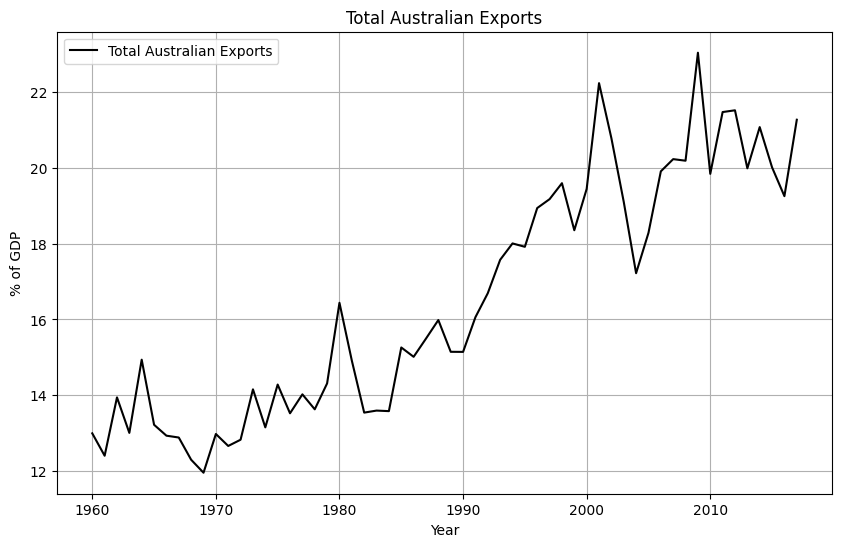

In [11]:
#시각화
plt.figure(figsize=(10, 6))
plt.plot(australia_exports['Year'], australia_exports['Exports'], label='Total Australian Exports', color='black')
plt.xlabel('Year')
plt.ylabel('% of GDP')
plt.title('Total Australian Exports')
plt.grid(True)
plt.legend()
plt.show()

#### 이동 평균

In [12]:
#이동 평균 구하기
australia_exports['3-MA'] = australia_exports['Exports'].rolling(window=3, center=True).mean()
australia_exports['5-MA'] = australia_exports['Exports'].rolling(window=5, center=True).mean()
australia_exports['7-MA'] = australia_exports['Exports'].rolling(window=7, center=True).mean()
australia_exports['9-MA'] = australia_exports['Exports'].rolling(window=9, center=True).mean()

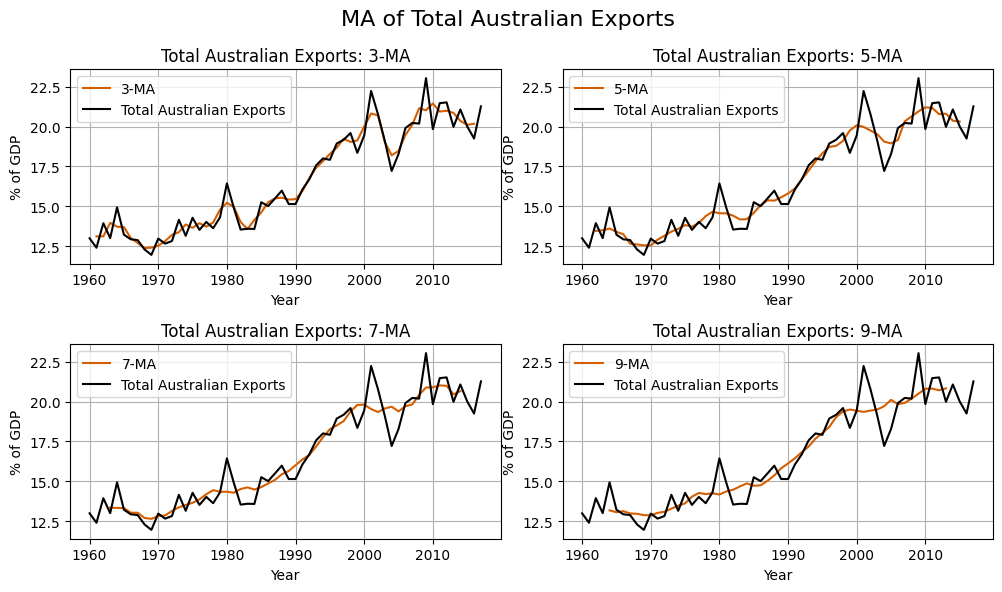

In [17]:
#이동 평균 시각화
fig, axes = plt.subplots(2, 2, figsize=(10, 6), sharex=False)

axes[0, 0].plot(australia_exports['Year'], australia_exports['3-MA'], label='3-MA', color='#D55E00')
axes[0, 0].set_title('Total Australian Exports: 3-MA')
axes[0, 1].plot(australia_exports['Year'], australia_exports['5-MA'], label='5-MA', color='#D55E00')
axes[0, 1].set_title('Total Australian Exports: 5-MA')
axes[1, 0].plot(australia_exports['Year'], australia_exports['7-MA'], label='7-MA', color='#D55E00')
axes[1, 0].set_title('Total Australian Exports: 7-MA')
axes[1, 1].plot(australia_exports['Year'], australia_exports['9-MA'], label='9-MA', color='#D55E00')
axes[1, 1].set_title('Total Australian Exports: 9-MA')

for i in range(2):
    for j in range(2):
        axes[i, j].plot(australia_exports['Year'], australia_exports['Exports'], label='Total Australian Exports', color='black')
        axes[i, j].set_ylabel("% of GDP")
        axes[i, j].set_xlabel('Year')
        axes[i, j].grid(True)
        axes[i, j].legend()

plt.suptitle("MA of Total Australian Exports", fontsize=16)
plt.tight_layout()
plt.show()

## 2. 지수 가중 이동 평균

### 알제리아 수출량 그래프

#### 데이터 불러오기

In [26]:
#데이터 불러오기
algeria_exports = global_economy[global_economy['Country'] == 'Algeria']
algeria_exports.index = algeria_exports['Year']
algeria_exports

,Country,Code,Year,GDP,Growth,CPI,Imports,Exports,Population
Year,,,,,,,,,
1960-01-01,Algeria,DZA,1960-01-01,2.723649e+09,NaN,NaN,67.143632,39.043173,11124888.0
1961-01-01,Algeria,DZA,1961-01-01,2.434777e+09,-13.605441,NaN,67.503771,46.244557,11404859.0
1962-01-01,Algeria,DZA,1962-01-01,2.001469e+09,-19.685042,NaN,20.818647,19.793873,11690153.0
1963-01-01,Algeria,DZA,1963-01-01,2.703015e+09,34.313729,NaN,36.825515,24.684682,11985136.0
1964-01-01,Algeria,DZA,1964-01-01,2.909352e+09,5.839413,NaN,29.439763,25.084059,12295970.0
1965-01-01,Algeria,DZA,1965-01-01,3.136259e+09,6.206898,NaN,25.833078,22.603944,12626952.0
1966-01-01,Algeria,DZA,1966-01-01,3.039835e+09,-4.804971,NaN,24.653572,25.986198,12980267.0
1967-01-01,Algeria,DZA,1967-01-01,3.370843e+09,9.452963,NaN,21.631769,23.434417,13354197.0
1968-01-01,Algeria,DZA,1968-01-01,3.852116e+09,10.796239,NaN,24.187254,23.135635,13744387.0


#### 지수 가중 이동 평균 모델 적합

In [29]:
#모델 적합
fit = ETSModel(algeria_exports['Exports']).fit()

#### 모델을 이용한 예측

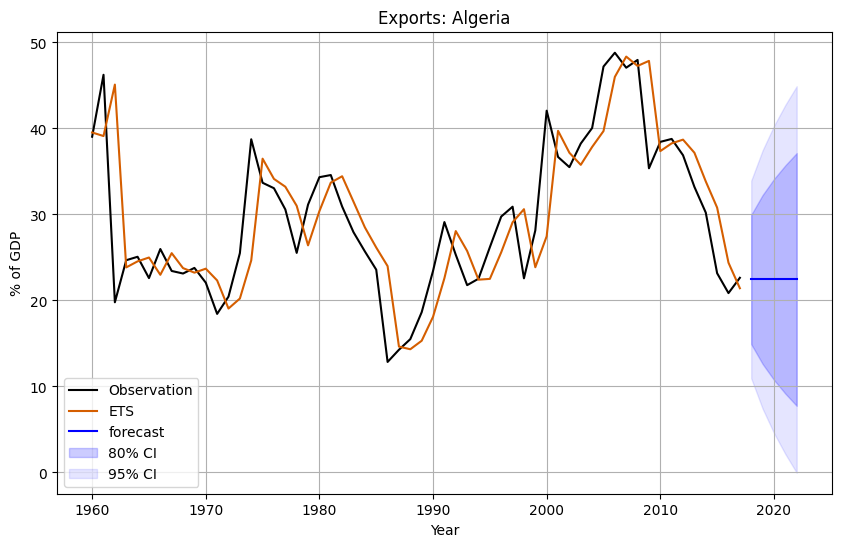

In [31]:
#예측값 구하기
forecast = fit.forecast(5)
ci = fit.get_prediction(start = forecast.index[0], end = forecast.index[-1])
lower_ci80 = ci.pred_int(alpha=0.2).iloc[:,0]
upper_ci80 = ci.pred_int(alpha=0.2).iloc[:,1]
lower_ci95 = ci.pred_int(alpha=0.05).iloc[:,0]
upper_ci95 = ci.pred_int(alpha=0.05).iloc[:,1]

#예측 시각화
plt.figure(figsize=(10, 6))
plt.plot(algeria_exports['Exports'], label='Observation', color='black')
plt.plot(fit.fittedvalues, label='ETS', color='#D55E00')
plt.plot(forecast, label='forecast', color='b')
plt.fill_between(forecast.index, lower_ci80, upper_ci80, label='80% CI', color='b', alpha=.2)
plt.fill_between(forecast.index, lower_ci95, upper_ci95, label='95% CI', color='b', alpha=.1)
plt.xlabel('Year')
plt.ylabel('% of GDP')
plt.title('Exports: Algeria')
plt.grid(True)
plt.legend()
plt.show()

## 3. 홀트의 지수 평활화 기법

### 1) 호주 인구 그래프

#### 데이터 불러오기

In [35]:
#데이터 불러오기
australia_economy = global_economy[global_economy['Country'] == 'Australia']
australia_economy.index = australia_economy['Year']
australia_pop = australia_economy[['Population']]
australia_pop

,Population
Year,
1960-01-01,10276477.0
1961-01-01,10483000.0
1962-01-01,10742000.0
1963-01-01,10950000.0
1964-01-01,11167000.0
1965-01-01,11388000.0
1966-01-01,11651000.0
1967-01-01,11799000.0
1968-01-01,12009000.0


#### 감쇠 추세법 모델 적합

In [34]:
#모델 적합
fit_pop1 = ETSModel(australia_pop['Population'], trend='add').fit()
fit_pop2 = ETSModel(australia_pop['Population'], trend='add', damped_trend=True).fit_constrained({"damping_trend": 0.9})

#### 모델을 이용한 예측

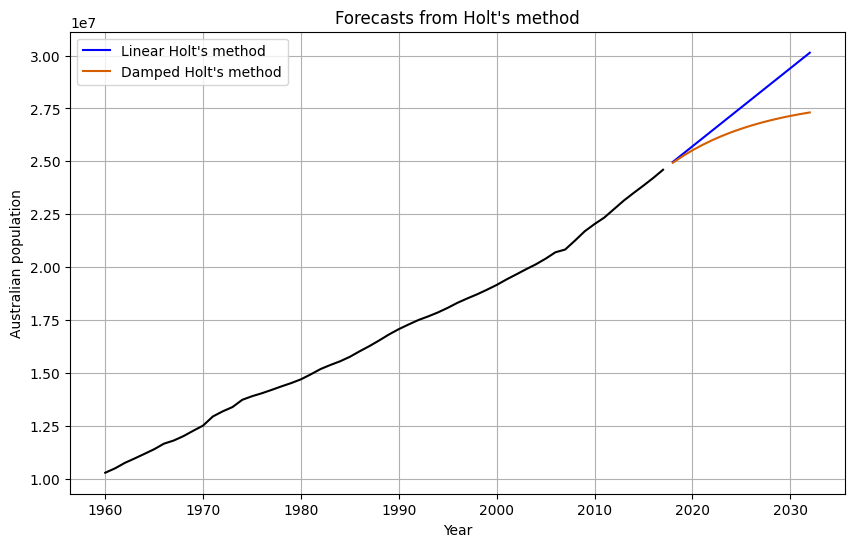

In [36]:
#예측값 구하기
forecast_pop1 = fit_pop1.forecast(15)
forecast_pop2 = fit_pop2.forecast(15)

#예측 시각화
plt.figure(figsize=(10, 6))
plt.plot(australia_pop['Population'],  color='black')
plt.plot(forecast_pop1, label='Linear Holt\'s method', color='b')
plt.plot(forecast_pop2, label='Damped Holt\'s method', color='#D55E00')
plt.xlabel('Year')
plt.ylabel('Australian population')
plt.title('Forecasts from Holt\'s method')
plt.grid(True)
plt.legend()
plt.show()

### 2) 인터넷 유저 그래프

#### 데이터 불러오기

In [39]:
www_usage = pd.read_csv('https://raw.githubusercontent.com/safeai-snu/Econometrics/main/dataset/Ch.3/WWWusage.csv', index_col=1)
www_usage = www_usage[['value']]
www_usage

,value
time,
1,88
2,84
3,85
4,85
5,84
...,...
96,222
97,228
98,226


#### 감쇠 추세법 모델 적합

In [43]:
#모델 적합
fit = ETSModel(www_usage['value'], trend='add', damped_trend=True).fit()

#### 모델을 이용한 예측

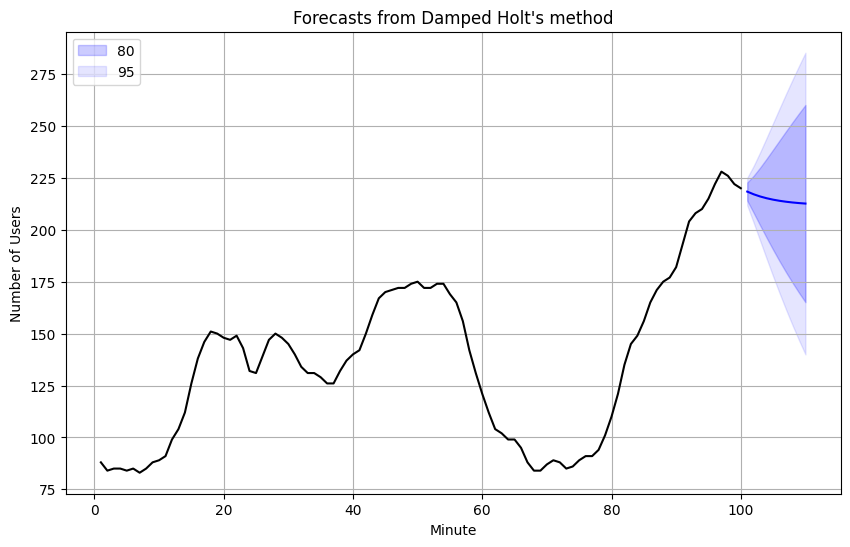

In [44]:
#예측값 구하기
forecast = fit.forecast(10)
ci = fit.get_prediction(start = forecast.index[0], end = forecast.index[-1])
lower_ci80 = ci.pred_int(alpha=0.2).iloc[:,0]
upper_ci80 = ci.pred_int(alpha=0.2).iloc[:,1]
lower_ci95 = ci.pred_int(alpha=0.05).iloc[:,0]
upper_ci95 = ci.pred_int(alpha=0.05).iloc[:,1]

#예측 시각화
plt.figure(figsize=(10, 6))
plt.plot(www_usage['value'], color='black')
plt.plot(forecast.index+1, forecast.values, color='b')
plt.fill_between(forecast.index+1, lower_ci80, upper_ci80, label='80', color='b', alpha=.2)
plt.fill_between(forecast.index+1, lower_ci95, upper_ci95, label='95', color='b', alpha=.1)
plt.xlabel('Minute')
plt.ylabel('Number of Users')
plt.title('Forecasts from Damped Holt\'s method')
plt.grid(True)
plt.legend()
plt.show()

## 4. Holt-Winters 지수 평활화

### 1) 호주 백신 수요: 가산법

#### 데이터 불러오기

In [5]:
#데이터 불러오기
pbs = pd.read_csv("https://raw.githubusercontent.com/safeai-snu/Econometrics/main/dataset/Ch.3/PBS.csv")
pbs = pbs[pbs["ATC2"] == 'J07'].iloc[:204]
pbs.index = pd.date_range(start='1/1/1984', periods=204, freq='1MS')
pbs

,Unnamed: 0,Month,Concession,Type,ATC1,ATC1_desc,ATC2,ATC2_desc,Scripts,Cost
1984-01-01,10093,7851,Concessional,Co-payments,J,Antiinfectives for systemic use,J07,VACCINES,45382,486702.0
1984-02-01,10094,7882,Concessional,Co-payments,J,Antiinfectives for systemic use,J07,VACCINES,8306,93761.0
1984-03-01,10095,7913,Concessional,Co-payments,J,Antiinfectives for systemic use,J07,VACCINES,8519,95649.0
1984-04-01,10096,7943,Concessional,Co-payments,J,Antiinfectives for systemic use,J07,VACCINES,3253,39525.0
1984-05-01,10097,7974,Concessional,Co-payments,J,Antiinfectives for systemic use,J07,VACCINES,2211,28711.0
...,...,...,...,...,...,...,...,...,...,...
2000-08-01,10292,13910,Concessional,Co-payments,J,Antiinfectives for systemic use,J07,VACCINES,889,31721.0
2000-09-01,10293,13939,Concessional,Co-payments,J,Antiinfectives for systemic use,J07,VACCINES,3880,77596.0
2000-10-01,10294,13970,Concessional,Co-payments,J,Antiinfectives for systemic use,J07,VACCINES,89095,1272830.0
2000-11-01,10295,14000,Concessional,Co-payments,J,Antiinfectives for systemic use,J07,VACCINES,196715,2755875.0


#### 지수 평활화 모델 적합

In [6]:
#모델 적합
fit_pbs1 = ETSModel(pbs['Cost'], seasonal='add', seasonal_periods=12).fit_constrained({"smoothing_seasonal": 0.00})
fit_pbs2 = ETSModel(pbs['Cost'], seasonal='add', seasonal_periods=12).fit_constrained({"smoothing_seasonal": 0.72})
fit_pbs3 = ETSModel(pbs['Cost'], seasonal='add', seasonal_periods=12).fit_constrained({"smoothing_seasonal": 1.00})

#### 모델 시각화

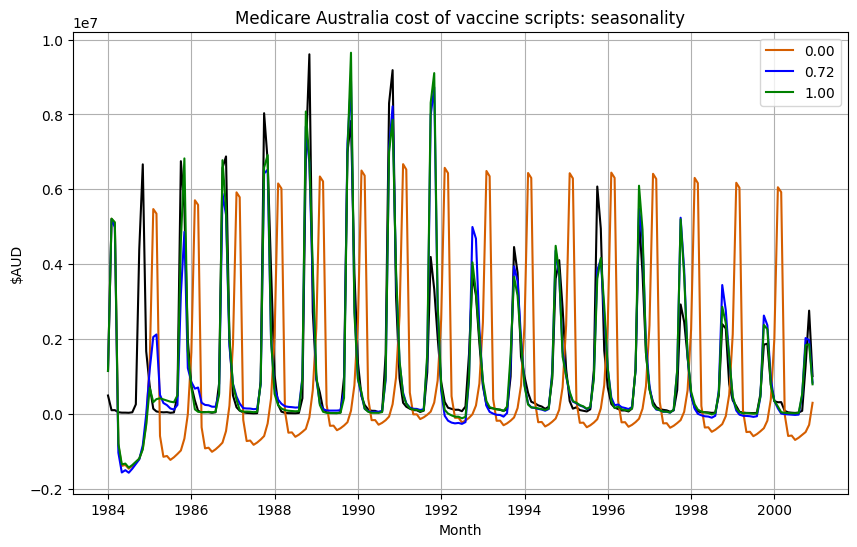

In [8]:
#가산법 모델 시각화
plt.figure(figsize=(10, 6))
plt.plot(pbs['Cost'],  color='black')
plt.plot(fit_pbs1.fittedvalues, label='0.00', color='#D55E00')
plt.plot(fit_pbs2.fittedvalues, label='0.72', color='b')
plt.plot(fit_pbs3.fittedvalues, label='1.00', color='green')
plt.xlabel('Month')
plt.ylabel('$AUD')
plt.title('Medicare Australia cost of vaccine scripts: seasonality')
plt.grid(True)
plt.legend()
plt.show()

### 2) 호주 국내 여행객: 승산법

#### 데이터 불러오기

In [12]:
#데이터 불러오기
tourism = pd.read_csv("https://raw.githubusercontent.com/safeai-snu/Econometrics/main/dataset/Ch.3/tourism.csv")
tourism = tourism[tourism["Purpose"] == "Holiday"]
tourism = tourism[["Quarter", "Trips"]]
tourism = tourism.groupby("Quarter").sum()
tourism.index = pd.date_range(start='2/3/1998', periods=80, freq='3MS')
tourism = tourism[['Trips']]
tourism

,Trips
1998-03-01,11806.037622
1998-06-01,9275.662074
1998-09-01,8642.488590
1998-12-01,9299.523781
1999-03-01,11172.027056
...,...
2016-12-01,10084.964670
2017-03-01,12406.418863
2017-06-01,10471.197262
2017-09-01,10499.165370


#### 지수 평활화 모델 적합

In [15]:
#모델 적합
fit_tour1 = ETSModel(tourism['Trips'], error='add', trend='add', seasonal='add').fit()
fit_tour2 = ETSModel(tourism['Trips'], error='mul', trend='add', seasonal='mul').fit()

#모델 파라미터 출력
print(f"AAA: alpha = {fit_tour1.smoothing_level}, beta = {fit_tour1.smoothing_trend}, gamma = {fit_tour1.smoothing_seasonal}")
print(f"MAM: alpha = {fit_tour2.smoothing_level}, beta = {fit_tour2.smoothing_trend}, gamma = {fit_tour2.smoothing_seasonal}")

AAA: alpha = 0.08623111562431679, beta = 0.013207088782149264, gamma = 0.6862540106204006
MAM: alpha = 0.3830127710310351, beta = 0.01776890940197622, gamma = 6.169872289689648e-05


#### 모델 분해 시각화

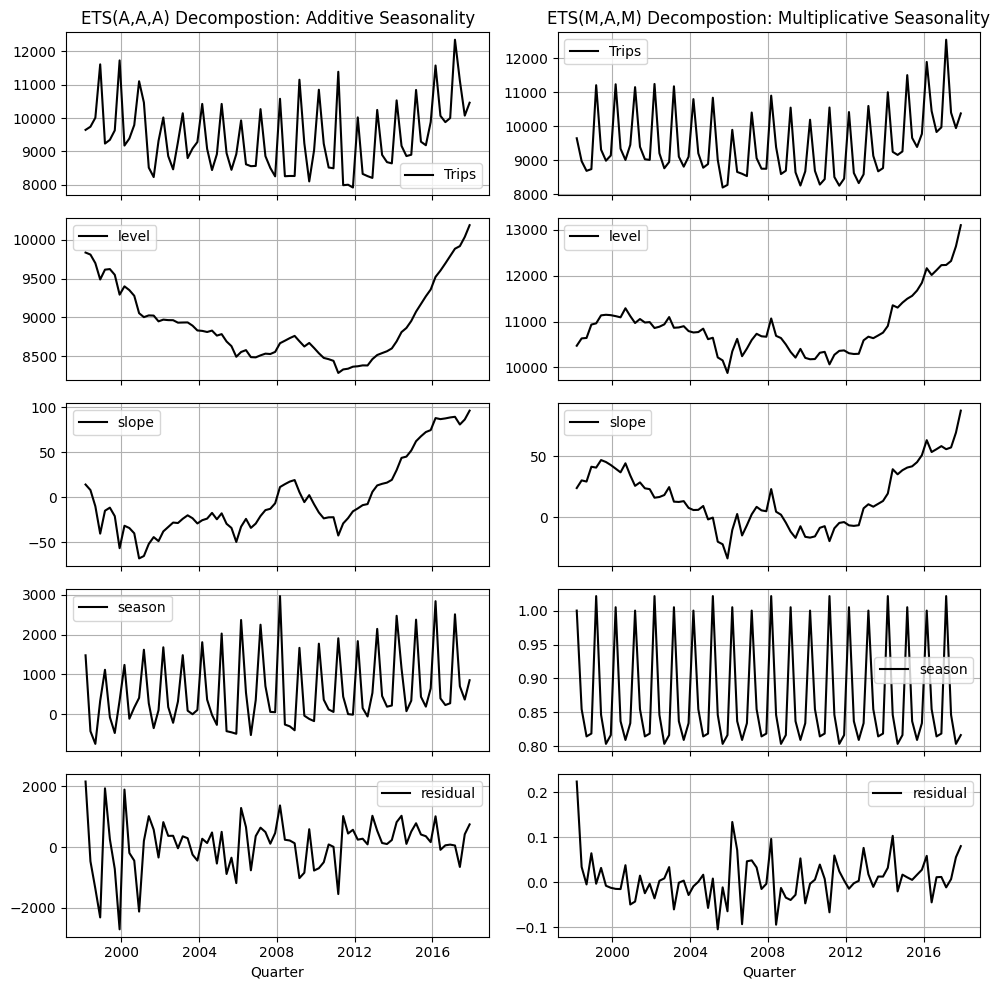

In [22]:
#모델 분해 후 시각화화
fig, axes = plt.subplots(5, 2, figsize=(10, 10), sharex=True)

#가산법
axes[0, 0].plot(fit_tour1.fittedvalues, label='Trips', color='black')
axes[0, 0].set_title('ETS(A,A,A) Decompostion: Additive Seasonality')
axes[1, 0].plot(fit_tour1.level, label='level', color='black')
axes[2, 0].plot(fit_tour1.slope, label='slope', color='black')
axes[3, 0].plot(fit_tour1.season, label='season', color='black')
axes[4, 0].plot(fit_tour1.resid, label='residual', color='black')
axes[4, 0].set_xlabel('Quarter')

#승산법
axes[0, 1].plot(fit_tour2.fittedvalues, label='Trips', color='black')
axes[0, 1].set_title('ETS(M,A,M) Decompostion: Multiplicative Seasonality')
axes[1, 1].plot(fit_tour2.level, label='level', color='black')
axes[2, 1].plot(fit_tour2.slope, label='slope', color='black')
axes[3, 1].plot(fit_tour2.season, label='season', color='black')
axes[4, 1].plot(fit_tour2.resid, label='residual', color='black')
axes[4, 1].set_xlabel('Quarter')

for i in range(5):
    for j in range(2):
        axes[i, j].grid(True)
        axes[i, j].legend()

plt.tight_layout()
plt.show()

#### 모델을 이용한 예측

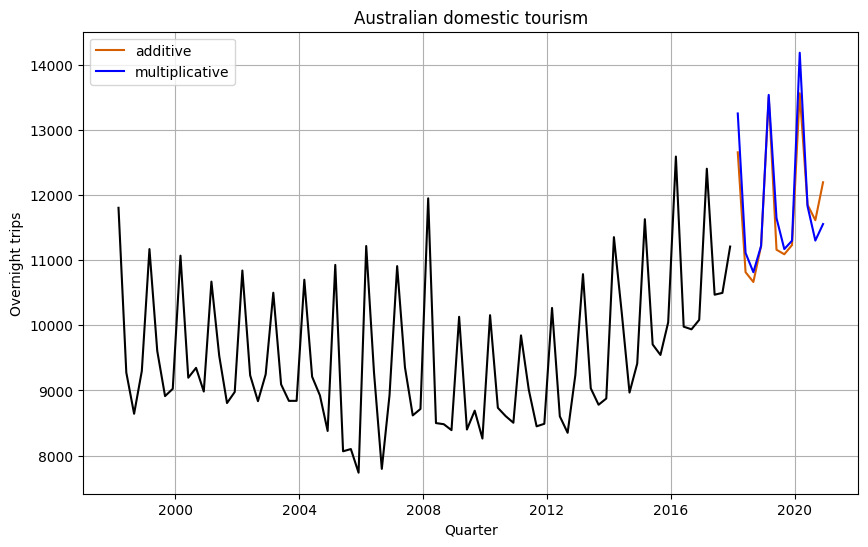

In [14]:
#예측값 구하기
forecast_tour1 = fit_tour1.forecast(12)
forecast_tour2 = fit_tour2.forecast(12)

#예측 시각화
plt.figure(figsize=(10, 6))
plt.plot(tourism['Trips'],  color='black')
plt.plot(forecast_tour1, label='additive', color='#D55E00')
plt.plot(forecast_tour2, label='multiplicative', color='b')
plt.xlabel('Quarter')
plt.ylabel('Overnight trips')
plt.title('Australian domestic tourism')
plt.grid(True)
plt.legend()
plt.show()

# 3.1.2 지수 평활화 상태 공간 모델

## ETS 모델을 통한 예측

### 호주 국내 여행객 그래프

#### 모듈과 데이터 불러오기 

In [24]:
#모듈 불러오기
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.exponential_smoothing.ets import ETSModel

import warnings
warnings.filterwarnings('ignore')

#데이터 불러오기
tourism = pd.read_csv("https://raw.githubusercontent.com/safeai-snu/Econometrics/main/dataset/Ch.3/tourism.csv")
tourism = tourism[tourism["Purpose"] == "Holiday"]
tourism = tourism[["Quarter", "Trips"]]
tourism = tourism.groupby("Quarter").sum()
tourism.index = pd.date_range(start='2/3/1998', periods=80, freq='3MS')
tourism = tourism[['Trips']]
tourism

,Trips
1998-03-01,11806.037622
1998-06-01,9275.662074
1998-09-01,8642.488590
1998-12-01,9299.523781
1999-03-01,11172.027056
...,...
2016-12-01,10084.964670
2017-03-01,12406.418863
2017-06-01,10471.197262
2017-09-01,10499.165370


#### 모델 적합

In [25]:
#모델 적합
fit = ETSModel(tourism['Trips'], error='add', trend=None, seasonal='add').fit()

#### 모델을 이용한 예측

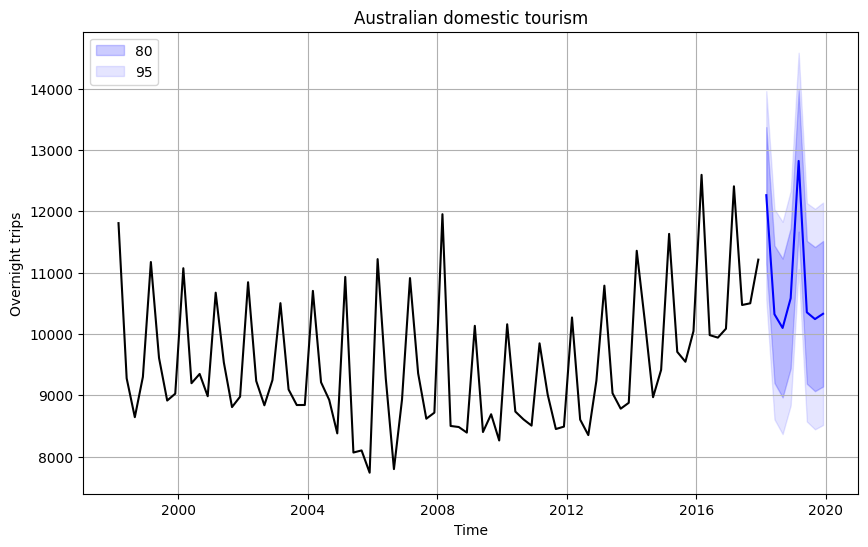

In [41]:
#예측값 구하기
forecast = fit.forecast(8)
ci = fit.get_prediction(start = forecast.index[0], end = forecast.index[-1])
lower_ci80 = ci.pred_int(alpha=0.2).iloc[:,0]
upper_ci80 = ci.pred_int(alpha=0.2).iloc[:,1]
lower_ci95 = ci.pred_int(alpha=0.05).iloc[:,0]
upper_ci95 = ci.pred_int(alpha=0.05).iloc[:,1]

#예측 시각화
plt.figure(figsize=(10, 6))
plt.plot(tourism['Trips'], color='black')
plt.plot(forecast, color='b')
plt.fill_between(forecast.index, lower_ci80, upper_ci80, label='80', color='b', alpha=.2)
plt.fill_between(forecast.index, lower_ci95, upper_ci95, label='95', color='b', alpha=.1)
plt.xlabel('Time')
plt.ylabel('Overnight trips')
plt.title('Australian domestic tourism')
plt.grid(True)
plt.legend()
plt.show()